In [19]:
from google.colab import files

# Prompt the user to upload an image file (this will open a file chooser dialog in Colab)
uploaded_files = files.upload()

# Check if a file was uploaded
if uploaded_files:
    # Get the uploaded file name (the keys of uploaded_files dict are the file names)
    image_filename = next(iter(uploaded_files))
    print(f"Uploaded file: {image_filename}")
else:
    print("No file uploaded. Please run this cell again and upload an image.")


Saving 91-ai-breast-memogram.jpg to 91-ai-breast-memogram.jpg
Uploaded file: 91-ai-breast-memogram.jpg


In [20]:
from PIL import Image
import numpy as np

# Open the uploaded image file using PIL
image = Image.open(image_filename)

# Convert the image to grayscale (if it's not already in grayscale).
# The 'L' mode in PIL means 8-bit grayscale.
image_gray = image.convert('L')

# Convert the PIL image to a NumPy array, so we can perform numeric operations
img_array = np.array(image_gray)

# Print out the shape of the image array to confirm it's 2D (grayscale)
print("Image shape (height, width):", img_array.shape)


Image shape (height, width): (1024, 1024)


In [21]:
print(img_array)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [22]:
# Compute the 2D Fast Fourier Transform (FFT) of the image.
# This returns a complex array of the same size as the image, with real and imaginary parts.
F = np.fft.fft2(img_array)

print("F: ",F)

# Shift the zero-frequency (DC) component to the center of the spectrum for better visualization.
# By default, np.fft.fft2 puts the DC component at [0,0].
F_shifted = np.fft.fftshift(F)

print("F_shifted: ",F_shifted)

# Compute the magnitude spectrum of the shifted FFT.
# np.abs(F_shifted) gives the magnitude (strength) of each frequency component:contentReference[oaicite:10]{index=10}.
# We use np.log to compress the scale (otherwise a few high values might dominate the display):contentReference[oaicite:11]{index=11}.
# (Adding a small constant avoids log(0) if any frequency has zero magnitude.)
magnitude_spectrum = 20 * np.log(np.abs(F_shifted) + 1e-8)

# Compute the phase spectrum of the shifted FFT.
# np.angle(F_shifted) gives the phase angle in radians for each frequency component:contentReference[oaicite:12]{index=12}.
phase_spectrum = np.angle(F_shifted)

# Confirm the results are the same size as the original image
print("FFT array shape:", F_shifted.shape)
print("Magnitude spectrum stats - min:", magnitude_spectrum.min(), " max:", magnitude_spectrum.max())
print("Phase spectrum stats - min:", phase_spectrum.min(), " max:", phase_spectrum.max())


F:  [[ 62737255.              +0.j
  -10914360.19575736 +851651.59269375j
  -12657390.66533161 -395275.00178785j ...
    1063539.44860687+1793804.89615178j
  -12657390.66533161 +395275.00178784j
  -10914360.19575736 -851651.59269375j]
 [-16471653.04004766 -992299.68172749j
   -6333423.93866217+1576222.74168255j
    3086152.35406072+3758091.95452796j ...
    4268131.21970856-3372656.75812366j
    2352800.48378459+1777637.08878631j
   -3818501.37415681+3688316.0829443j ]
 [  1736245.64950588-7798715.03595439j
    3350132.94426109 -864641.40797447j
     796178.53534543+4231606.7044218j  ...
   -1291704.66916873-3437159.71559122j
     634993.32990294+3692613.77943848j
    3063590.75954754 -635780.00092844j]
 ...
 [   408106.73718894+3750748.79823714j
     464052.79408467-1201837.50364009j
    -615143.16749024-4175215.29131909j ...
   -1712906.51319349+1350350.93182267j
    -906235.37335921-4299583.26255483j
     607502.25532873 -710514.05541034j]
 [  1736245.64950588+7798715.03595439j
    

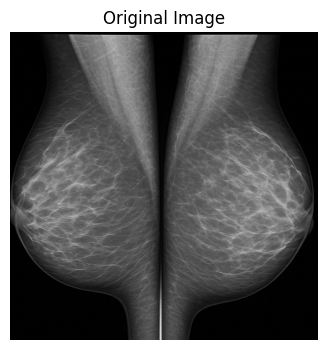

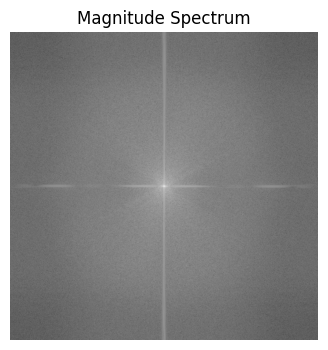

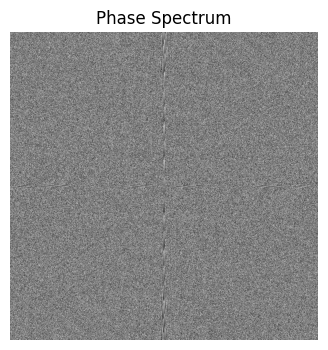

In [23]:
import matplotlib.pyplot as plt

# Plot the original grayscale image
plt.figure(figsize=(6, 4))
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis ticks and labels for clarity
plt.show()

# Plot the magnitude spectrum
plt.figure(figsize=(6, 4))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

# Plot the phase spectrum
plt.figure(figsize=(6, 4))
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')
plt.show()
